In [6]:
import sys
from Detect import Detector
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import numpy as np
import cv2
from filters import filter_image, warp
from util import vconcat_resize, hconcat_resize


In [7]:
DEBUG = True

In [8]:
def process_image(image):
    filtered_binary = filter_image(image)
    binary_warped = warp(filtered_binary * 255)
    b_img = np.dstack(
        (binary_warped, binary_warped, binary_warped))*255
    f_image = np.dstack(
        (filtered_binary, filtered_binary, filtered_binary))*255
    result = detector.detect_lanes(binary_warped, image)
    if DEBUG:
        return vconcat_resize([result, hconcat_resize([b_img, f_image])])
    else:
        return result

In [11]:
test_file="Project_data/test_images/"
test_images=["straight_lines1.jpg","straight_lines2.jpg","test1.jpg","test2.jpg","test3.jpg","test4.jpg","test5.jpg","test6.jpg"]
test_images=[test_file+ele for ele in test_images]
detector = Detector()

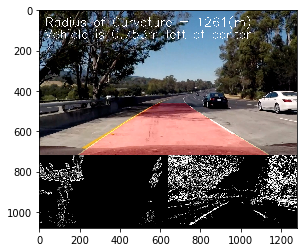

In [12]:
img = cv2.imread(test_images[6])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)
plt.imshow(process_image(img))

